In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# linspace构建0到100均匀数字 作为 时间轴 x
# 生成0到100的100个数构成的等差数列
x = torch.linspace(0.0,100.0,steps=100).type(torch.FloatTensor)
print(x)
# 构造噪音
'''
torch.randn(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution).
返回，均值为0，方差为10的正态分布
'''
rand = torch.randn(100)*10 # *10 10份不同的随机值


tensor([  0.0000,   1.0101,   2.0202,   3.0303,   4.0404,   5.0505,   6.0606,
          7.0707,   8.0808,   9.0909,  10.1010,  11.1111,  12.1212,  13.1313,
         14.1414,  15.1515,  16.1616,  17.1717,  18.1818,  19.1919,  20.2020,
         21.2121,  22.2222,  23.2323,  24.2424,  25.2525,  26.2626,  27.2727,
         28.2828,  29.2929,  30.3030,  31.3131,  32.3232,  33.3333,  34.3434,
         35.3535,  36.3636,  37.3737,  38.3838,  39.3939,  40.4040,  41.4141,
         42.4242,  43.4343,  44.4444,  45.4545,  46.4646,  47.4747,  48.4848,
         49.4949,  50.5051,  51.5152,  52.5253,  53.5354,  54.5455,  55.5556,
         56.5657,  57.5758,  58.5859,  59.5960,  60.6061,  61.6162,  62.6263,
         63.6364,  64.6465,  65.6566,  66.6667,  67.6768,  68.6869,  69.6970,
         70.7071,  71.7172,  72.7273,  73.7374,  74.7475,  75.7576,  76.7677,
         77.7778,  78.7879,  79.7980,  80.8081,  81.8182,  82.8283,  83.8384,
         84.8485,  85.8586,  86.8687,  87.8788,  88.8889,  89.89

In [3]:
# 添加噪音
y = x + rand

In [4]:
# 拆分训练集，

x_train = x[:-10]
x_test = x[-10:]

y_train = y[:-10]
y_test = y[-10:]


Text(0, 0.5, 'Y')

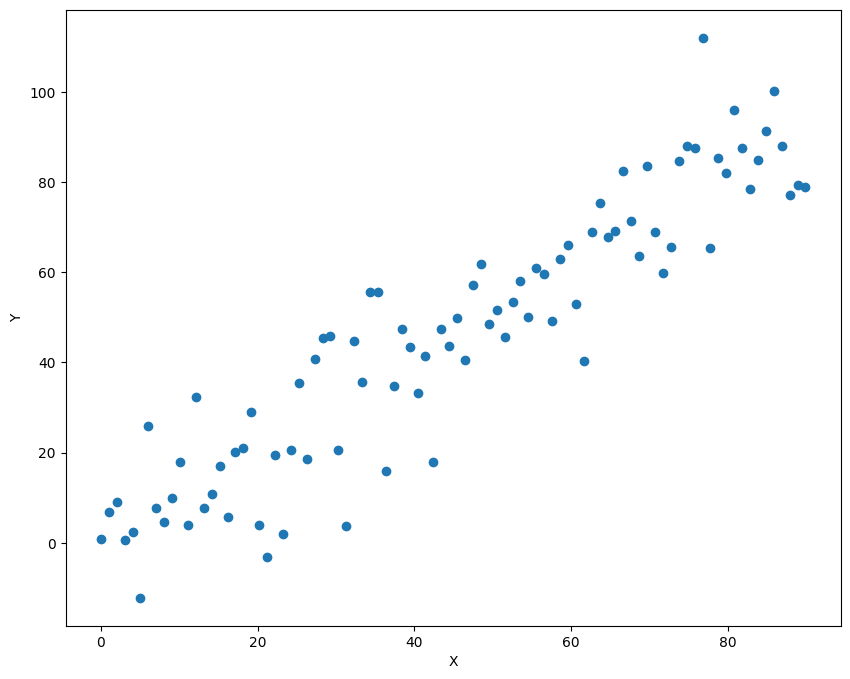

In [5]:
# 数据源可视化

plt.figure(figsize=(10,8)) # 设定画布大小10*8 inch
# 绘图
# tensor 变量转换为numpy变量
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'o')
plt.xlabel('X')
plt.ylabel('Y')

In [6]:
# 训练
# 建立两个自动微分变量
# torch.rand(*sizes, out=None)→ Tensor; [0,1)之间的均匀分布
a = torch.rand(1,requires_grad=True) 
b = torch.rand(1,requires_grad=True) 

# 学习率 ，连续导数梯度下降之间步进
learning_rate = 0.0001


In [7]:
# 迭代
for i in range(1000):
    # 代入公式 ax+b
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
    # expand_as 作用是 将a，b 张量的维度扩充到和 x_train 一样
    
    
    # x**2  ,x的2次幂(平方)
    loss= torch.mean(predictions - y_train)**2 # 通过与标签数据y比较计算误差
    if i%100 == 0:
        print('loss:',loss)
    
    loss.backward() # 对损失函数进行梯度反转(反向传播)
    
    # 利用上一步计算中得到的a的梯度(导数)信息，更新a中的 data 数值
    a.data.add_(- learning_rate * a.grad.data )
    # 利用上一步计算中得到的b的梯度(导数)信息，更新b中的 data 数值
    b.data.add_(- learning_rate * b.grad.data )
    
    # 清空存储在a、b中的梯度(grad，导数)信息，以免在backward的过程中反复不停的累加
    a.grad.data.zero_()
    b.grad.data.zero_()

loss: tensor(750.9257, grad_fn=<PowBackward0>)
loss: tensor(1.9564e-12, grad_fn=<PowBackward0>)
loss: tensor(1.9564e-12, grad_fn=<PowBackward0>)
loss: tensor(1.9564e-12, grad_fn=<PowBackward0>)
loss: tensor(1.9564e-12, grad_fn=<PowBackward0>)
loss: tensor(1.9564e-12, grad_fn=<PowBackward0>)
loss: tensor(1.9564e-12, grad_fn=<PowBackward0>)
loss: tensor(1.9564e-12, grad_fn=<PowBackward0>)
loss: tensor(1.9564e-12, grad_fn=<PowBackward0>)
loss: tensor(1.9564e-12, grad_fn=<PowBackward0>)


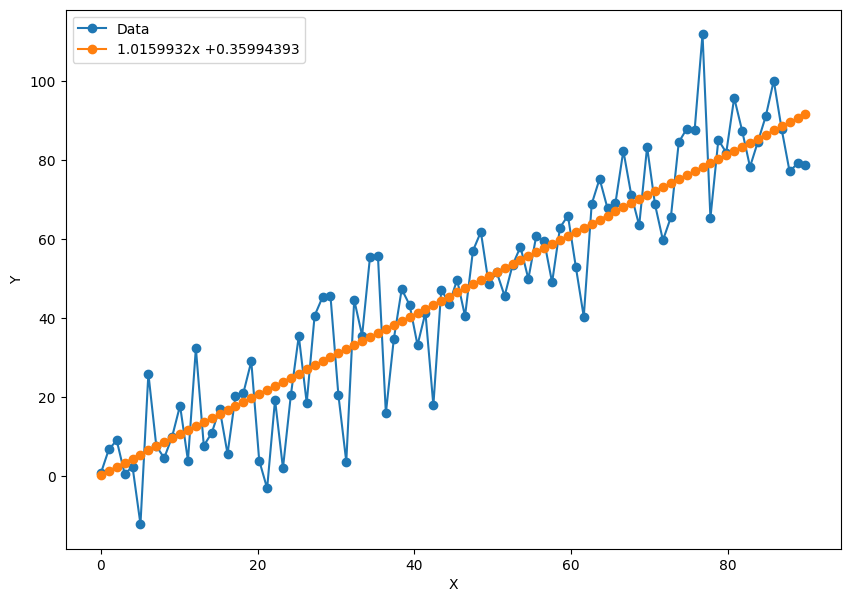

In [8]:
# 预测结果可视化
x_data= x_train.data.numpy()
plt.figure(figsize=(10,7))
# 将拟合直线的参数 a,b显示出来, 同时绘制实际y，以及 y 直线
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
xplot = plt.plot(x_data,y_train.data.numpy(),label ='Data', marker='o') # 实际y
yplot = plt.plot(x_data,a.data.numpy()*x_data+b.data.numpy(),label =str1,marker='o') # 绘制拟合的y 直线图  y= a.data.numpy()*x_data+b.data.numpy()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

tensor([ 92.7230,  93.7492,  94.7755,  95.8017,  96.8280,  97.8542,  98.8805,
         99.9068, 100.9330, 101.9593], grad_fn=<AddBackward0>)


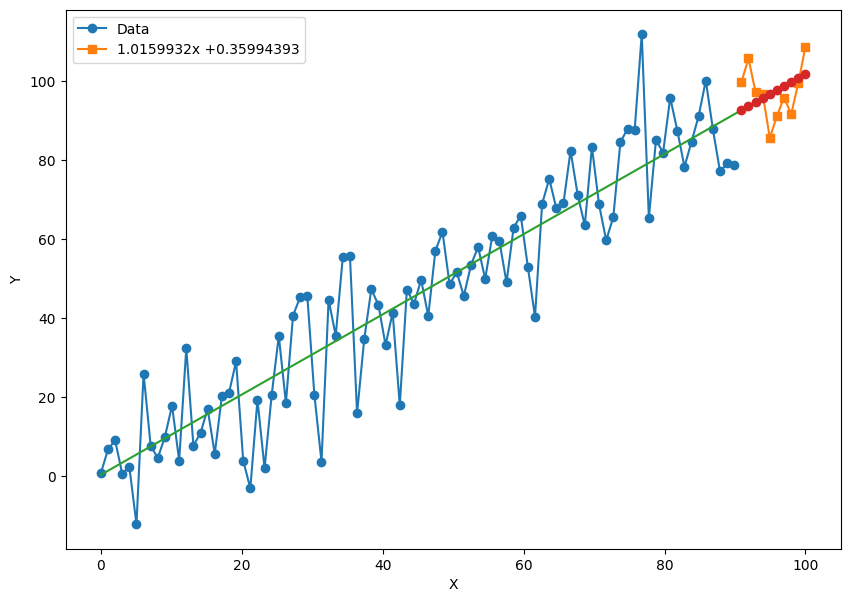

In [9]:
# 预测

predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test) # 计算模型的预测结果
print(predictions)

x_data = x_train.data.numpy() # 获得x包裹的数据
x_pred = x_test.data.numpy()
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
'''
label 指定标签
marker 指定绘图形状
https://matplotlib.org/stable/api/markers_api.html?highlight=mark#module-matplotlib.markers
'''
xplot = plt.plot(x_data, y_train.data.numpy(),label ='Data',marker='o') # 绘制训练数据
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
yplot = plt.plot(x_pred, y_test.data.numpy(),label =str1,marker='s') # 绘制测试数据
x_data = np.r_[x_data, x_test.data.numpy()]

plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  #绘制拟合数据
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o') #绘制预测数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0]) #图例信息

plt.legend() #绘制图例